In [1]:
# Import thư viện
import pandas as pd
import  numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Đọc dữ liệu
df = pd.read_csv('CleanData.csv')
df

,Name,Brand,Announced,Status,Size,Resolution,OS,Chipset,Card slot,ROM,...,Pic MC,Video MC,Num of SC,Pic SC,3.5mm jack,Battery,Price,ScreenArea,ppi,Link
0,1T 7,alcatel,2018-02-01,Available,7.0,600 x 1024,Android 8.1 (Oreo),Mediatek MT8321A (28 nm),microSDXC,8GB,...,2.0,720p,1,0.3,Yes,2580.0,70.0,137.9,170.0,https://www.gsmarena.com/alcatel_1t_7-9094.php
1,Idol 5s,alcatel,2017-09-01,Available,5.2,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6757 Helio P20 (16 nm),microSDXC,32GB,...,12.0,1080p,1,8.0,Yes,2850.0,140.0,74.5,424.0,https://www.gsmarena.com/alcatel_idol_5s-8844.php
2,Idol 5,alcatel,2017-09-01,Available,5.2,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6753 (28 nm),microSDXC,16GB,...,13.0,1080p,1,5.0,Yes,2800.0,120.0,74.9,423.0,https://www.gsmarena.com/alcatel_idol_5-8832.php
3,A7 XL,alcatel,2017-09-01,Available,6.0,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6750S (28 nm),microSDHC,32GB,...,12.0,1080p,1,5.0,Yes,4000.0,260.0,99.2,367.0,https://www.gsmarena.com/alcatel_a7_xl-8843.php
4,A7,alcatel,2017-09-01,Available,5.5,1080 x 1920,Android 7.0 (Nougat),Mediatek MT6750T (28 nm),microSDXC,32GB,...,16.0,1080p,1,8.0,Yes,4000.0,190.0,83.4,401.0,https://www.gsmarena.com/alcatel_a7-8830.php
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,Flash,ZTE,2012-11-01,Discontinued,4.5,720 x 1280,Android 4.0.4 (Ice Cream Sandwich),Qualcomm MSM8960 Snapdragon S4 Plus,microSDXC,8GB,...,6.0,1080p,1,1.0,Yes,1780.0,360.0,55.8,326.0,https://www.gsmarena.com/zte_flash-4893.php
4501,Grand Era U895,ZTE,2012-09-01,Discontinued,4.5,720 x 1280,Android 4.0 (Ice Cream Sandwich),Nvidia Tegra 3,microSDHC,4GB,...,8.0,1080p,1,3.0,Yes,1800.0,380.0,55.8,326.0,https://www.gsmarena.com/zte_grand_era_u895-50...
4502,Grand X IN,ZTE,2012-08-01,Discontinued,4.3,540 x 960,Android 4.0 (Ice Cream Sandwich),Intel XMM 6260,microSDHC,4GB,...,8.0,1080p,1,0.3,Yes,1650.0,430.0,51.0,256.0,https://www.gsmarena.com/zte_grand_x_in-4962.php
4503,Grand X LTE T82,ZTE,2012-07-01,Discontinued,4.3,540 x 960,Android 4.0 (Ice Cream Sandwich),Qualcomm MSM8960 Snapdragon S4 Plus,microSDHC,4GB,...,8.0,1080p,1,3.0,Yes,1900.0,340.0,51.0,256.0,https://www.gsmarena.com/zte_grand_x_lte_t82-4...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        4505 non-null   object 
 1   Brand       4505 non-null   object 
 2   Announced   4505 non-null   object 
 3   Status      4505 non-null   object 
 4   Size        4505 non-null   float64
 5   Resolution  4505 non-null   object 
 6   OS          4505 non-null   object 
 7   Chipset     4505 non-null   object 
 8   Card slot   4505 non-null   object 
 9   ROM         4505 non-null   object 
 10  RAM         4505 non-null   object 
 11  Num of MC   4505 non-null   int64  
 12  Pic MC      4505 non-null   float64
 13  Video MC    4505 non-null   object 
 14  Num of SC   4505 non-null   int64  
 15  Pic SC      4505 non-null   float64
 16  3.5mm jack  4505 non-null   object 
 17  Battery     4505 non-null   float64
 18  Price       4505 non-null   float64
 19  ScreenArea  4505 non-null  

In [11]:
new_col = {}
for col in df.columns:
    new_col[col] = col.replace(" ","_").lower()
new_col

{'Name': 'name',
 'Brand': 'brand',
 'Announced': 'announced',
 'Status': 'status',
 'Size': 'size',
 'Resolution': 'resolution',
 'OS': 'os',
 'Chipset': 'chipset',
 'Card slot': 'card_slot',
 'ROM': 'rom',
 'RAM': 'ram',
 'Num of MC': 'num_of_mc',
 'Pic MC': 'pic_mc',
 'Video MC': 'video_mc',
 'Num of SC': 'num_of_sc',
 'Pic SC': 'pic_sc',
 '3.5mm jack': '3.5mm_jack',
 'Battery': 'battery',
 'Price': 'price',
 'ScreenArea': 'screenarea',
 'ppi': 'ppi',
 'Link': 'link'}

,name,brand,announced,status,size,resolution,os,chipset,card_slot,rom,...,pic_mc,video_mc,num_of_sc,pic_sc,3.5mm_jack,battery,price,screenarea,ppi,link
0,1T 7,alcatel,2018-02-01,Available,7.0,600 x 1024,Android 8.1 (Oreo),Mediatek MT8321A (28 nm),microSDXC,8GB,...,2.0,720p,1,0.3,Yes,2580.0,70.0,137.9,170.0,https://www.gsmarena.com/alcatel_1t_7-9094.php
1,Idol 5s,alcatel,2017-09-01,Available,5.2,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6757 Helio P20 (16 nm),microSDXC,32GB,...,12.0,1080p,1,8.0,Yes,2850.0,140.0,74.5,424.0,https://www.gsmarena.com/alcatel_idol_5s-8844.php
2,Idol 5,alcatel,2017-09-01,Available,5.2,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6753 (28 nm),microSDXC,16GB,...,13.0,1080p,1,5.0,Yes,2800.0,120.0,74.9,423.0,https://www.gsmarena.com/alcatel_idol_5-8832.php
3,A7 XL,alcatel,2017-09-01,Available,6.0,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6750S (28 nm),microSDHC,32GB,...,12.0,1080p,1,5.0,Yes,4000.0,260.0,99.2,367.0,https://www.gsmarena.com/alcatel_a7_xl-8843.php
4,A7,alcatel,2017-09-01,Available,5.5,1080 x 1920,Android 7.0 (Nougat),Mediatek MT6750T (28 nm),microSDXC,32GB,...,16.0,1080p,1,8.0,Yes,4000.0,190.0,83.4,401.0,https://www.gsmarena.com/alcatel_a7-8830.php
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4500,Flash,ZTE,2012-11-01,Discontinued,4.5,720 x 1280,Android 4.0.4 (Ice Cream Sandwich),Qualcomm MSM8960 Snapdragon S4 Plus,microSDXC,8GB,...,6.0,1080p,1,1.0,Yes,1780.0,360.0,55.8,326.0,https://www.gsmarena.com/zte_flash-4893.php
4501,Grand Era U895,ZTE,2012-09-01,Discontinued,4.5,720 x 1280,Android 4.0 (Ice Cream Sandwich),Nvidia Tegra 3,microSDHC,4GB,...,8.0,1080p,1,3.0,Yes,1800.0,380.0,55.8,326.0,https://www.gsmarena.com/zte_grand_era_u895-50...
4502,Grand X IN,ZTE,2012-08-01,Discontinued,4.3,540 x 960,Android 4.0 (Ice Cream Sandwich),Intel XMM 6260,microSDHC,4GB,...,8.0,1080p,1,0.3,Yes,1650.0,430.0,51.0,256.0,https://www.gsmarena.com/zte_grand_x_in-4962.php
4503,Grand X LTE T82,ZTE,2012-07-01,Discontinued,4.3,540 x 960,Android 4.0 (Ice Cream Sandwich),Qualcomm MSM8960 Snapdragon S4 Plus,microSDHC,4GB,...,8.0,1080p,1,3.0,Yes,1900.0,340.0,51.0,256.0,https://www.gsmarena.com/zte_grand_x_lte_t82-4...


In [26]:
df_av = df[df.Status == "Available"].rename(columns = new_col)

In [27]:
df_av.reset_index(drop=True,inplace= True)

In [29]:
df_av

,name,brand,announced,status,size,resolution,os,chipset,card_slot,rom,...,pic_mc,video_mc,num_of_sc,pic_sc,3.5mm_jack,battery,price,screenarea,ppi,link
0,1T 7,alcatel,2018-02-01,Available,7.0,600 x 1024,Android 8.1 (Oreo),Mediatek MT8321A (28 nm),microSDXC,8GB,...,2.0,720p,1,0.3,Yes,2580.0,70.0,137.9,170.0,https://www.gsmarena.com/alcatel_1t_7-9094.php
1,Idol 5s,alcatel,2017-09-01,Available,5.2,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6757 Helio P20 (16 nm),microSDXC,32GB,...,12.0,1080p,1,8.0,Yes,2850.0,140.0,74.5,424.0,https://www.gsmarena.com/alcatel_idol_5s-8844.php
2,Idol 5,alcatel,2017-09-01,Available,5.2,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6753 (28 nm),microSDXC,16GB,...,13.0,1080p,1,5.0,Yes,2800.0,120.0,74.9,423.0,https://www.gsmarena.com/alcatel_idol_5-8832.php
3,A7 XL,alcatel,2017-09-01,Available,6.0,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6750S (28 nm),microSDHC,32GB,...,12.0,1080p,1,5.0,Yes,4000.0,260.0,99.2,367.0,https://www.gsmarena.com/alcatel_a7_xl-8843.php
4,A7,alcatel,2017-09-01,Available,5.5,1080 x 1920,Android 7.0 (Nougat),Mediatek MT6750T (28 nm),microSDXC,32GB,...,16.0,1080p,1,8.0,Yes,4000.0,190.0,83.4,401.0,https://www.gsmarena.com/alcatel_a7-8830.php
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,Blade A2 Plus,ZTE,2017-02-01,Available,5.5,1080 x 1920,Android 6.0 (Marshmallow),Mediatek MT6750T (28 nm),microSDXC,32GB,...,13.0,1080p,1,8.0,Yes,5000.0,150.0,83.4,401.0,https://www.gsmarena.com/zte_blade_a2_plus-856...
2688,Blade V8 Pro,ZTE,2017-01-01,Available,5.5,1080 x 1920,Android 6.0.1 (Marshmallow),Qualcomm MSM8953 Snapdragon 625 (14 nm),microSDXC,32GB,...,13.0,4K,1,8.0,Yes,3140.0,200.0,83.4,401.0,https://www.gsmarena.com/zte_blade_v8_pro-8504...
2689,Blade V8,ZTE,2017-01-01,Available,5.2,1080 x 1920,Android 7.0 (Nougat),Qualcomm MSM8940 Snapdragon 435 (28 nm),microSDXC,16GB,...,13.0,1080p,1,13.0,Yes,2730.0,250.0,74.5,424.0,https://www.gsmarena.com/zte_blade_v8-8501.php
2690,Grand X4,ZTE,2016-09-01,Available,5.5,720 x 1280,Android 6.0.1 (Marshmallow),Qualcomm MSM8917 Snapdragon 425 (28 nm),microSDXC,16GB,...,13.0,1080p,1,5.0,Yes,3140.0,200.0,83.4,267.0,https://www.gsmarena.com/zte_grand_x4-8638.php


In [34]:
df_av.rename(columns={"3.5mm_jack":"jack"},inplace=True)

In [35]:
df_av

,name,brand,announced,status,size,resolution,os,chipset,card_slot,rom,...,video_mc,num_of_sc,pic_sc,jack,battery,price,screenarea,ppi,link,id
0,1T 7,alcatel,2018-02-01,Available,7.0,600 x 1024,Android 8.1 (Oreo),Mediatek MT8321A (28 nm),microSDXC,8GB,...,720p,1,0.3,Yes,2580.0,70.0,137.9,170.0,https://www.gsmarena.com/alcatel_1t_7-9094.php,0
1,Idol 5s,alcatel,2017-09-01,Available,5.2,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6757 Helio P20 (16 nm),microSDXC,32GB,...,1080p,1,8.0,Yes,2850.0,140.0,74.5,424.0,https://www.gsmarena.com/alcatel_idol_5s-8844.php,1
2,Idol 5,alcatel,2017-09-01,Available,5.2,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6753 (28 nm),microSDXC,16GB,...,1080p,1,5.0,Yes,2800.0,120.0,74.9,423.0,https://www.gsmarena.com/alcatel_idol_5-8832.php,2
3,A7 XL,alcatel,2017-09-01,Available,6.0,1080 x 1920,Android 7.1 (Nougat),Mediatek MT6750S (28 nm),microSDHC,32GB,...,1080p,1,5.0,Yes,4000.0,260.0,99.2,367.0,https://www.gsmarena.com/alcatel_a7_xl-8843.php,3
4,A7,alcatel,2017-09-01,Available,5.5,1080 x 1920,Android 7.0 (Nougat),Mediatek MT6750T (28 nm),microSDXC,32GB,...,1080p,1,8.0,Yes,4000.0,190.0,83.4,401.0,https://www.gsmarena.com/alcatel_a7-8830.php,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,Blade A2 Plus,ZTE,2017-02-01,Available,5.5,1080 x 1920,Android 6.0 (Marshmallow),Mediatek MT6750T (28 nm),microSDXC,32GB,...,1080p,1,8.0,Yes,5000.0,150.0,83.4,401.0,https://www.gsmarena.com/zte_blade_a2_plus-856...,2687
2688,Blade V8 Pro,ZTE,2017-01-01,Available,5.5,1080 x 1920,Android 6.0.1 (Marshmallow),Qualcomm MSM8953 Snapdragon 625 (14 nm),microSDXC,32GB,...,4K,1,8.0,Yes,3140.0,200.0,83.4,401.0,https://www.gsmarena.com/zte_blade_v8_pro-8504...,2688
2689,Blade V8,ZTE,2017-01-01,Available,5.2,1080 x 1920,Android 7.0 (Nougat),Qualcomm MSM8940 Snapdragon 435 (28 nm),microSDXC,16GB,...,1080p,1,13.0,Yes,2730.0,250.0,74.5,424.0,https://www.gsmarena.com/zte_blade_v8-8501.php,2689
2690,Grand X4,ZTE,2016-09-01,Available,5.5,720 x 1280,Android 6.0.1 (Marshmallow),Qualcomm MSM8917 Snapdragon 425 (28 nm),microSDXC,16GB,...,1080p,1,5.0,Yes,3140.0,200.0,83.4,267.0,https://www.gsmarena.com/zte_grand_x4-8638.php,2690


In [30]:
df_av['id'] = np.arange(len(df_av))

In [36]:
df_av.to_csv("dataPhone.csv", index=False)

In [37]:
df_av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        2692 non-null   object 
 1   brand       2692 non-null   object 
 2   announced   2692 non-null   object 
 3   status      2692 non-null   object 
 4   size        2692 non-null   float64
 5   resolution  2692 non-null   object 
 6   os          2692 non-null   object 
 7   chipset     2692 non-null   object 
 8   card_slot   2692 non-null   object 
 9   rom         2692 non-null   object 
 10  ram         2692 non-null   object 
 11  num_of_mc   2692 non-null   int64  
 12  pic_mc      2692 non-null   float64
 13  video_mc    2692 non-null   object 
 14  num_of_sc   2692 non-null   int64  
 15  pic_sc      2692 non-null   float64
 16  jack        2692 non-null   object 
 17  battery     2692 non-null   float64
 18  price       2692 non-null   float64
 19  screenarea  2692 non-null  

* Tiến hành xây dựng mô hình phân loại để phân tích giá của điện thoại 

In [96]:
for i in df.index:
    if df.at[i,'Price'] < 250 :
        df.at[i,'Price'] = 0  
    elif df.at[i,'Price'] < 600 :
        df.at[i,'Price'] = 1 
    else :
        df.at[i,'Price'] = 2 

* Tiến hành gán nhãn cột giá cho các mẫu điện thoại : 
    + Nếu giá < 250 thì là giá thấp (0)
    + Nếu giá < 600 thì là giá trung bình (1)
    + Nếu giá > 600 thì là giá cao (2)


In [97]:
for i in df.index:
    df.at[i,'Announced'] = df.at[i,'Announced'].split('-')[0]

* Đối với cột Announced ta sẽ tách lấy năm 
* Đối với cột Pic MC,SC sẽ bao gồm nhiều thông số do máy có thể có nhiều camera 
     + Vì vậy ta lấy thông số cao nhất để làm đại diện cho cột


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        4505 non-null   object 
 1   Brand       4505 non-null   object 
 2   Announced   4505 non-null   object 
 3   Status      4505 non-null   object 
 4   Size        4505 non-null   float64
 5   Resolution  4505 non-null   object 
 6   OS          4505 non-null   object 
 7   Chipset     4505 non-null   object 
 8   Card slot   4505 non-null   object 
 9   ROM         4505 non-null   object 
 10  RAM         4505 non-null   object 
 11  Num of MC   4505 non-null   int64  
 12  Pic MC      4505 non-null   float64
 13  Video MC    4505 non-null   object 
 14  Num of SC   4505 non-null   int64  
 15  Pic SC      4505 non-null   float64
 16  3.5mm jack  4505 non-null   object 
 17  Battery     4505 non-null   float64
 18  Price       4505 non-null   float64
 19  ScreenArea  4505 non-null  

In [99]:
columns_qual = ['Brand', 'Status', 'Resolution', 'OS',
       'Chipset', 'Card slot', 'Video MC', '3.5mm jack','RAM','ROM','Pic MC','Pic SC']
for columns in columns_qual :
    le = LabelEncoder()
    df[columns] = le.fit_transform(df[columns])

* Đối với những cột mang giá trị định tính (ngoài trừ Announced)  ta tiến hành chuyển sang định lượng 

In [34]:
# kiểm tra lại 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        4505 non-null   object 
 1   Brand       4505 non-null   int32  
 2   Announced   4505 non-null   object 
 3   Status      4505 non-null   int32  
 4   Size        4505 non-null   float64
 5   Resolution  4505 non-null   int32  
 6   OS          4505 non-null   int32  
 7   Chipset     4505 non-null   int32  
 8   Card slot   4505 non-null   int32  
 9   ROM         4505 non-null   int32  
 10  RAM         4505 non-null   int32  
 11  Num of MC   4505 non-null   int64  
 12  Pic MC      4505 non-null   int64  
 13  Video MC    4505 non-null   int32  
 14  Num of SC   4505 non-null   int64  
 15  Pic SC      4505 non-null   int64  
 16  3.5mm jack  4505 non-null   int32  
 17  Battery     4505 non-null   float64
 18  Price       4505 non-null   float64
 19  ScreenArea  4505 non-null  

In [100]:
# Xác định các đặc trưng và nhãn
X =np.array(df.drop(['Name','Price','Link'] , axis = 1))
y = np.array(df['Price'])

In [142]:
model_select = []
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
svc = SVC()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()
svc.fit(X_train,y_train)
dtc.fit(X_train,y_train)
rfc.fit(X_train,y_train)
knn.fit(X_train,y_train)
yhat1 = svc.predict(X_test)
yhat2 = dtc.predict(X_test)
yhat3 = rfc.predict(X_test)
yhat4 = knn.predict(X_test)
model_select.append(accuracy_score(y_test,yhat1))
model_select.append(accuracy_score(y_test,yhat2))
model_select.append(accuracy_score(y_test,yhat3))
model_select.append(accuracy_score(y_test,yhat4))

In [144]:
model_select

[0.7014428412874584, 0.755826859045505, 0.8135405105438401, 0.7314095449500555]

* Như vậy ta thấy mô hình RandomForestClassifier có độ chính xác cao nhât với tập dữ liệu
     - Vì vậy ta chọn RandomForestClassifier

In [102]:
# Tạo ra một mảng để lưu accuracy score của mô hình sau mỗi KFold
acc = np.zeros((5,))


kf = KFold(n_splits = 5 , random_state = 0 , shuffle = True)
# Tạo ra 1 dic để tìm ra siêu tham số tốt nhất cho mô hình 
param_grid = { 'max_depth' : np.arange(2,50) }
yhat = y.copy()
for i , (train_index,test_index) in enumerate (kf.split(X)) :
    X_train,X_test = X[train_index] , X[test_index]
    y_train,y_test = y[train_index] , y[test_index]
    # Tạo mô hình chuẩn hoá dữ liệu phân phối chuẩn (StandardScaler) giúp mô hình học tốt hơn và học nhanh hơn 
    sd = StandardScaler()
    # Cho mô hình chuẩn hoá học dữ liệu học dữ liệu
    sd.fit(X_train)
    # Tiến hành chuẩn hoá dữ liệu
    X_train_sd = sd.transform(X_train)
    X_test_sd = sd.transform(X_test)
    # Tạo mô hình 
    dt=RandomForestClassifier(criterion = 'entropy')
    # Sử dụng GridSearchCV để tìm ra siêu tham số tốt nhất cho mô hình
    dt = GridSearchCV(dt,param_grid,cv = 3 )
    # Cho mô hình học dữ liệu
    dt.fit(X_train_sd,y_train)
    # Cho mô hình dự đoán
    yhat[test_index] = dt.predict(X_test_sd)
    # Đánh giá mô hình 
    acc[i] = accuracy_score(y_test,yhat[test_index])

In [149]:
print(dt.best_params_)

{'max_depth': 12}


* Ta thấy mô hình tốt nhất khi:
    + max_depth : 12

* Accuracy score (độ chính xác) là tỉ lệ giữa số điểm được dự đoán đúng và tổng số điểm trong tập dữ liệu kiểm thử.
* ở đây chúng ta dùng Accuracy score mean bởi vì có sự phân chia dữ liệu ngẫu nhiên giữa hai tập train và test .Bởi vậy để khách quan nhất chúng ta tính điểm trung bình sau 5 lần học

In [148]:
print('Accuracy score mean: ',np.mean(acc))

Accuracy score mean:  0.8022197558268591


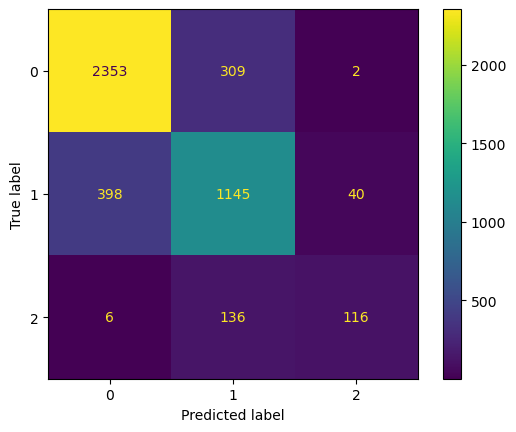

In [150]:
ConfusionMatrixDisplay(confusion_matrix(y,yhat)).plot()

* Có thật sự 2353 điện thoại có giá thấp (0) 
* Có thật sự 1145 điện thoại có giá trung bình (1) 
* Có thật sự 116 điện thoại có giá cao (2) 

In [170]:
print(classification_report(y,yhat, target_names = ['0','1','2']))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2664
           1       0.72      0.72      0.72      1583
           2       0.73      0.45      0.56       258

    accuracy                           0.80      4505
   macro avg       0.77      0.69      0.72      4505
weighted avg       0.80      0.80      0.80      4505



In [1]:
precision = [0.85,0.72,0.73]
recall = [0.88,0.72,0.45]
for i in range(0,3):
    print('(Precision) Tỉ lệ số điểm dự đoán giá ',i,' là đúng trong những diểm được phân loại là ', i ,': ',precision[i])
    print('(Recall) Tỉ lệ số điểm dự đoán giá ',i,' là đúng trong những diểm được thực sự là ', i ,': ',recall[i])
print('Precision của 0 cao đồng nghĩa với việc độ chính xác của các điểm tìm được là cao')
print('Recall của 0 là cao , 2 là thấp tức là tỉ lệ bỏ sót các điểm thực sự là 0 là thấp , ngược lại tỉ lệ bỏ sót các điểm thực sự là 2 là cao ')

(Precision) Tỉ lệ số điểm dự đoán giá  0  là đúng trong những diểm được phân loại là  0 :  0.85
(Recall) Tỉ lệ số điểm dự đoán giá  0  là đúng trong những diểm được thực sự là  0 :  0.88
(Precision) Tỉ lệ số điểm dự đoán giá  1  là đúng trong những diểm được phân loại là  1 :  0.72
(Recall) Tỉ lệ số điểm dự đoán giá  1  là đúng trong những diểm được thực sự là  1 :  0.72
(Precision) Tỉ lệ số điểm dự đoán giá  2  là đúng trong những diểm được phân loại là  2 :  0.73
(Recall) Tỉ lệ số điểm dự đoán giá  2  là đúng trong những diểm được thực sự là  2 :  0.45
Precision của 0 cao đồng nghĩa với việc độ chính xác của các điểm tìm được là cao
Recall của 0 là cao , 2 là thấp tức là tỉ lệ bỏ sót các điểm thực sự là 0 là thấp , ngược lại tỉ lệ bỏ sót các điểm thực sự là 2 là cao 


In [167]:
# Tiến hành train mô hình trên toàn tập dữ liệu 

In [168]:
# model=RandomForestClassifier(criterion = 'entropy' , max_depth =12 )
# model.fit(X,y)
# y_pred = model.predict(X)

# Tạo mô hình 
dt=RandomForestClassifier(criterion = 'entropy', max_depth = 12)
# Cho mô hình học dữ liệu
dt.fit(X,y)
y_pred = dt.predict(X)
accuracy_score(y,y_pred)

0.9420643729189789

* Mô hình có độ chính xác là 94%

In [ ]:
#